In [4]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [5]:
import numpy as np
import pandas as pd
import time
import random

from tensorflow.random import set_seed

from sklearn.model_selection import train_test_split

from keras.models import load_model

In [6]:
# Add modules path
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from src.data_reader import DataReader
from src.dataset_exploration import unit_cycle_info
from src.filtering import signal_smoothing
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves, plot_signal_filtering
from src.serialization import load_object
from src.training import train_evaluate_mlp, MLPConfigParams

In [8]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [9]:
# Set input and output paths
filename = '../data/N-CMAPSS_DS02-006.h5'
output_path = '../results/experiment_set_15_updated'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [10]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  3.640625
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [11]:
train_set = data_reader.train_set

In [12]:
y_train = train_set['RUL']
x_train = train_set.drop(['RUL'], axis=1)

In [13]:
selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
selected_columns_with_unit = selected_columns + ['unit']
x_train = x_train[selected_columns_with_unit]

In [14]:
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

Saved object to file: ../results/experiment_set_15_updated\results_es_0.001\split_0\scaler.pkl
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4864      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 235,137
Trainable params: 235,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
6477/6477 

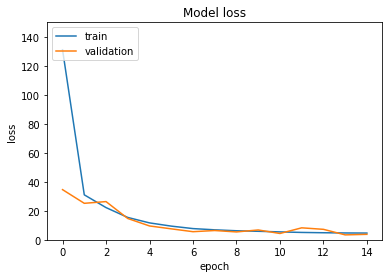

Saved object to file: ../results/experiment_set_15_updated\results_es_0.001\split_0\history_0.pkl
Test set:
MSE: 3.35
RMSE: 1.83
CMAPSS score: 1.11

Saved object to file: ../results/experiment_set_15_updated\results_es_0.001\split_1\scaler.pkl
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               4864      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total pa

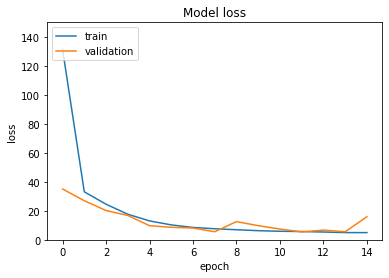

Saved object to file: ../results/experiment_set_15_updated\results_es_0.001\split_1\history_1.pkl
Test set:
MSE: 5.42
RMSE: 2.33
CMAPSS score: 1.15

Saved object to file: ../results/experiment_set_15_updated\results_es_0.001\split_2\scaler.pkl
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total pa

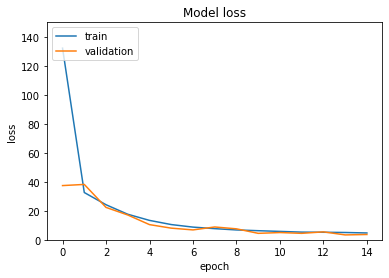

Saved object to file: ../results/experiment_set_15_updated\results_es_0.001\split_2\history_2.pkl
Test set:
MSE: 3.35
RMSE: 1.83
CMAPSS score: 1.11

MSE: mean = 4.04   stddev = 0.97
RMSE: mean = 2.00   stddev = 0.23
CMAPSS: mean = 1.12   stddev = 0.02
Saved object to file: ../results/experiment_set_15_updated\results_es_0.005\split_0\scaler.pkl
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
_____________________________________

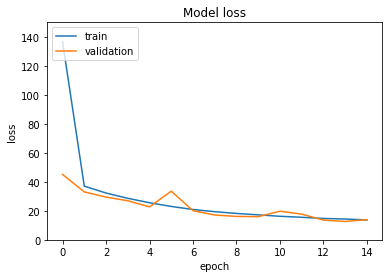

Saved object to file: ../results/experiment_set_15_updated\results_es_0.005\split_0\history_0.pkl
Test set:
MSE: 12.58
RMSE: 3.55
CMAPSS score: 1.26

Saved object to file: ../results/experiment_set_15_updated\results_es_0.005\split_1\scaler.pkl
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total p

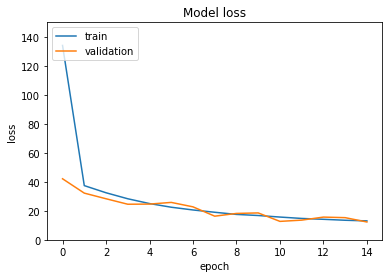

Saved object to file: ../results/experiment_set_15_updated\results_es_0.005\split_1\history_1.pkl
Test set:
MSE: 12.29
RMSE: 3.51
CMAPSS score: 1.25

Saved object to file: ../results/experiment_set_15_updated\results_es_0.005\split_2\scaler.pkl
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total p

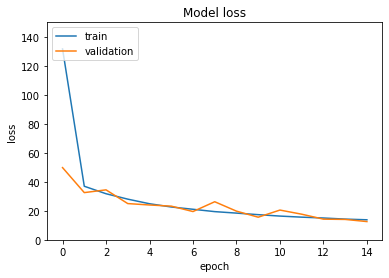

Saved object to file: ../results/experiment_set_15_updated\results_es_0.005\split_2\history_2.pkl
Test set:
MSE: 12.46
RMSE: 3.53
CMAPSS score: 1.25

MSE: mean = 12.44   stddev = 0.12
RMSE: mean = 3.53   stddev = 0.02
CMAPSS: mean = 1.25   stddev = 0.00
Saved object to file: ../results/experiment_set_15_updated\results_ma_25\split_0\scaler.pkl
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_33 (Dense)             (None, 64)                32832     
______________________________________

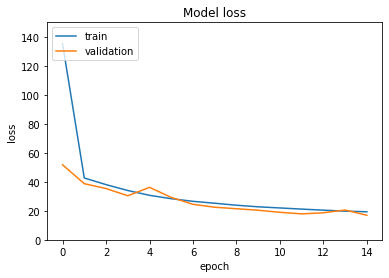

Saved object to file: ../results/experiment_set_15_updated\results_ma_25\split_0\history_0.pkl
Test set:
MSE: 16.94
RMSE: 4.12
CMAPSS score: 1.31

Saved object to file: ../results/experiment_set_15_updated\results_ma_25\split_1\scaler.pkl
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_38 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params:

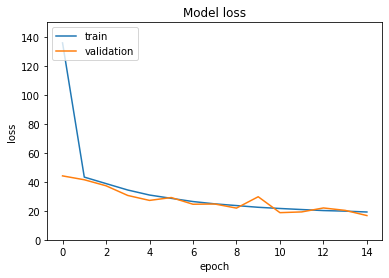

Saved object to file: ../results/experiment_set_15_updated\results_ma_25\split_1\history_1.pkl
Test set:
MSE: 16.80
RMSE: 4.10
CMAPSS score: 1.31

Saved object to file: ../results/experiment_set_15_updated\results_ma_25\split_2\scaler.pkl
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_43 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params:

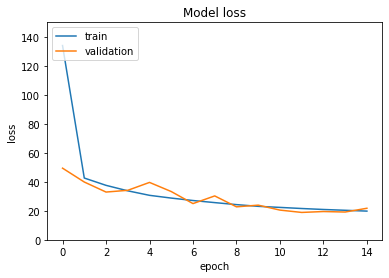

Saved object to file: ../results/experiment_set_15_updated\results_ma_25\split_2\history_2.pkl
Test set:
MSE: 18.75
RMSE: 4.33
CMAPSS score: 1.34

MSE: mean = 17.50   stddev = 0.89
RMSE: mean = 4.18   stddev = 0.10
CMAPSS: mean = 1.32   stddev = 0.01
Saved object to file: ../results/experiment_set_15_updated\results_ma_30\split_0\scaler.pkl
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_46 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_47 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_48 (Dense)             (None, 64)                32832     
_________________________________________

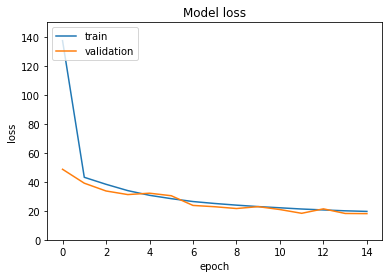

Saved object to file: ../results/experiment_set_15_updated\results_ma_30\split_0\history_0.pkl
Test set:
MSE: 17.96
RMSE: 4.24
CMAPSS score: 1.33

Saved object to file: ../results/experiment_set_15_updated\results_ma_30\split_1\scaler.pkl
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_52 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_53 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params

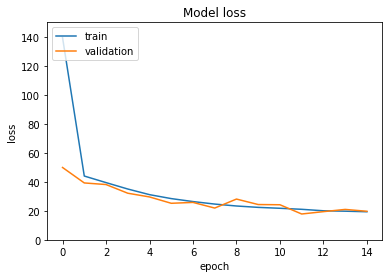

Saved object to file: ../results/experiment_set_15_updated\results_ma_30\split_1\history_1.pkl
Test set:
MSE: 17.86
RMSE: 4.23
CMAPSS score: 1.33

Saved object to file: ../results/experiment_set_15_updated\results_ma_30\split_2\scaler.pkl
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 256)               4864      
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_57 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_58 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total params

In [ ]:
################################################
# Effect of smoothing (experiment set 15 update)
################################################
NUM_TRIALS = 3
EPOCHS = 15
BATCH_SIZE = 512

mlp_params = MLPConfigParams(layer_sizes=[256, 256, 512, 64], activation='tanh', dropout=0)
alpha_vals = [0.001, 0.005]
w_vals = [25, 30]

filter_params = [("es", alpha) for alpha in alpha_vals] + [("ma", w) for w in w_vals]

results_file = os.path.join(output_path, "results_filtering_updated.csv")
with open(results_file, "w") as file:
    file.write("filter_type,filter_param,mse,rmse,cmapss,mse(mean),mse(std),rmse(mean),rmse(std),cmapss(mean),cmapss(std)\n")


for params in filter_params:
    filter_type, filter_param = params
    
    with open(results_file, "a") as file:
        file.write(f"{filter_type},{filter_param},")
    
    results_folder = f"results_{filter_type}_{filter_param}"
    results_path = os.path.join(output_path, results_folder)
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    
    # Filtering
    if filter_type == "None":
        x_train_filtered = x_train[selected_columns].astype(np.float32)
    else:
        x_train_filtered = signal_smoothing(x_train, selected_columns, filter_type, filter_param)
        x_train_filtered = x_train_filtered[selected_columns].astype(np.float32)
    
    # Validation split
    x_train_filtered, x_holdout_filtered, y_train_filtered, y_holdout_filtered = train_test_split(
        x_train_filtered, 
        y_train, 
        test_size=0.3, 
        random_state=seed)
    
    mse_vals, rmse_vals, cmapss_vals = train_evaluate_mlp(
        x_train_filtered, y_train_filtered, 
        x_holdout_filtered, y_holdout_filtered,
        NUM_TRIALS, 
        mlp_params, 
        results_path, 
        EPOCHS, BATCH_SIZE,
        results_file=results_file)

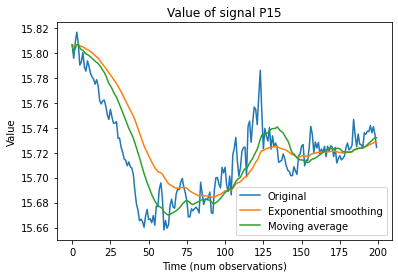

In [14]:
plot_signal_filtering(x_train, 'P15', alpha=0.05, w=20, 
                      output_path=os.path.join(output_path, "p15_smoothing.png"))